In [ ]:
# Link to Google Colab: https://colab.research.google.com/drive/1iYPT-H0gODOv1s-hJMxslW3QpRj_bBi9?usp=sharing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [7]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW2/Housing.csv'
data = pd.read_csv(file_url)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 None)

In [9]:
# Preprocessing: Encode categorical features and normalize numerical features
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(data[categorical_columns])

# Standardize numerical features
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(data[numerical_columns])

# Combine processed features
X_all_features = np.hstack((numerical_scaled, categorical_encoded))
y_all_features = data['price'].values

# Split the data into training and validation sets
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_all_features, y_all_features, test_size=0.2, random_state=42)

In [11]:
# Linear Regression model with gradient descent
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def initialize_parameters(self, n_features):
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.initialize_parameters(n_features)

        train_loss = []
        val_loss = []

        # Training loop
        for epoch in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            train_loss.append(loss)

            # Validation loss
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss.append(self.compute_loss(y_val, y_val_pred))

            # Print progress every 500 epochs
            if (epoch + 1) % 500 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs}: Train Loss = {loss:.4f}, Validation Loss = {val_loss[-1]:.4f}")

        return train_loss, val_loss

In [12]:
# Train the model using different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results_all_features = {}

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    model = LinearRegressionGD(learning_rate=lr, epochs=5000)
    train_loss, val_loss = model.train(X_train_all, y_train_all, X_val_all, y_val_all)
    results_all_features[lr] = (train_loss, val_loss, model.weights, model.bias)


Training with Learning Rate: 0.1
Epoch 500/5000: Train Loss = 968434161689.2682, Validation Loss = 1752041921466.2380
Epoch 1000/5000: Train Loss = 968358211635.4539, Validation Loss = 1754267726692.2485
Epoch 1500/5000: Train Loss = 968358188448.7123, Validation Loss = 1754317676955.1101
Epoch 2000/5000: Train Loss = 968358188440.7271, Validation Loss = 1754318667921.8079
Epoch 2500/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318686962.3716
Epoch 3000/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318687323.7144
Epoch 3500/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318687330.5369
Epoch 4000/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318687330.6660
Epoch 4500/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318687330.6667
Epoch 5000/5000: Train Loss = 968358188440.7242, Validation Loss = 1754318687330.6667

Training with Learning Rate: 0.01
Epoch 500/5000: Train Loss = 1126812705584.7939, Validation Loss = 18648

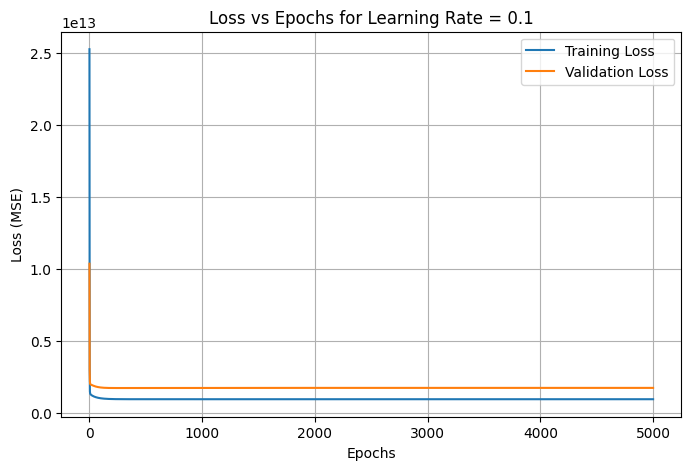

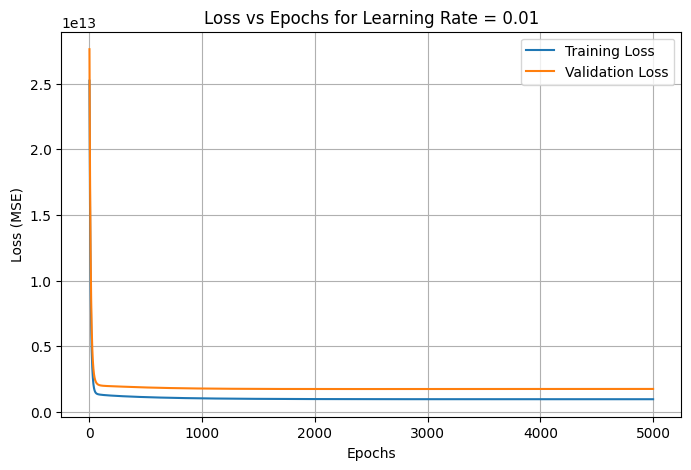

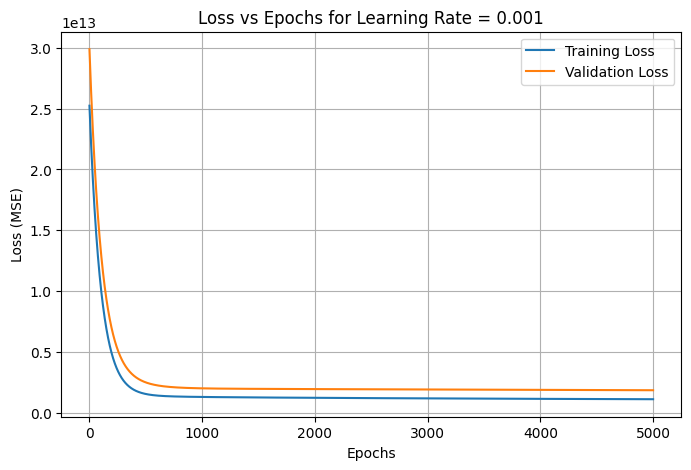

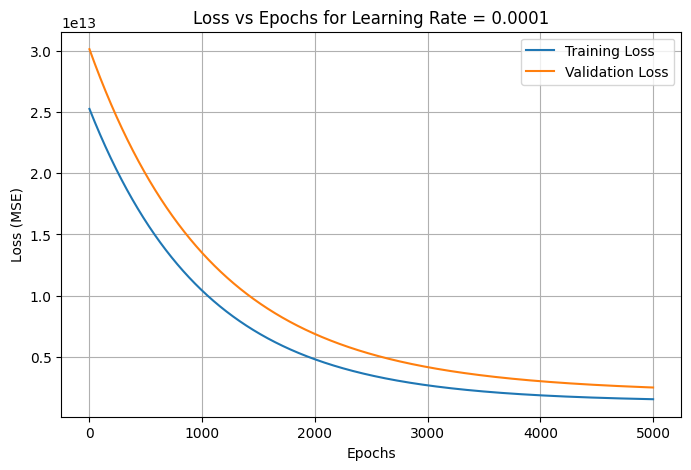

In [13]:
# Plot training and validation loss for each learning rate
for lr, (train_loss, val_loss, _, _) in results_all_features.items():
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss")
    plt.title(f"Loss vs Epochs for Learning Rate = {lr}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid()
    plt.show()